In [34]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [35]:
fh=download(url, "covid.csv")

"covid.csv"

In [36]:
using CSV 
using DataFrames 

In [37]:
data=CSV.read("covid.csv", DataFrame)

,Province/State,Country/Region,Lat,Long,1/22/20
,String?,String,Float64?,Float64?,Int64
1,missing,Afghanistan,33.9391,67.71,0
2,missing,Albania,41.1533,20.1683,0
3,missing,Algeria,28.0339,1.6596,0
4,missing,Andorra,42.5063,1.5218,0
5,missing,Angola,-11.2027,17.8739,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0
7,missing,Argentina,-38.4161,-63.6167,0
8,missing,Armenia,40.0691,45.0382,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0


In [38]:
all_countries=data[:, 2]

273-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Vanuatu"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Yemen"
 "Zambia"
 "Zimbabwe"

In [39]:
countries=["Colombia", "US", "China", "Mexico", "Spain", "Australia"]

6-element Array{String,1}:
 "Colombia"
 "US"
 "China"
 "Mexico"
 "Spain"
 "Australia"

In [40]:
num_days=length(data[1, :])-4

393

In [41]:
countriesvector=zeros(length(countries), num_days)

6×393 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [42]:
count=0
count2=0


for country in countries
    count2=count2+1
    for scountry in all_countries
        count=count + 1
        if scountry==country
            println(scountry, count)
            println(count2)
            count3=1
            for cell in data[count, 5:end]
                countriesvector[count2, count3]=countriesvector[count2, count3] + cell
                count3=count3+1
            end
            
        end
    
    end
    count=0
end
            

Colombia92
1
US250
2
China59
3
China60
3
China61
3
China62
3
China63
3
China64
3
China65
3
China66
3
China67
3
China68
3
China69
3
China70
3
China71
3
China72
3
China73
3
China74
3
China75
3
China76
3
China77
3
China78
3
China79
3
China80
3
China81
3
China82
3
China83
3
China84
3
China85
3
China86
3
China87
3
China88
3
China89
3
China90
3
China91
3
Mexico182
4
Spain234
5
Australia9
6
Australia10
6
Australia11
6
Australia12
6
Australia13
6
Australia14
6
Australia15
6
Australia16
6


In [43]:
data[234, :]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20
,String?,String,Float64?,Float64?,Int64,Int64,Int64,Int64
234,missing,Spain,40.4637,-3.74922,0,0,0,0


Change zeros to NaN 

In [44]:
countcountries=0
countcells=0
for country in countries 
    countcountries=countcountries+1
    for cell in countriesvector[countcountries, 1:end]
        countcells=countcells+1
        if cell==0
            countriesvector[countcountries, countcells]=NaN
        end
    end
    countcells=0
end


countriesvector


6×393 Array{Float64,2}:
 NaN    NaN    NaN     NaN     NaN    …       2.2026e6        2.2077e6
   1.0    1.0    2.0     2.0     5.0          2.77566e7       2.78268e7
 548.0  643.0  920.0  1406.0  2075.0     100639.0        100666.0
 NaN    NaN    NaN     NaN     NaN            2.00458e6       2.01356e6
 NaN    NaN    NaN     NaN     NaN            3.09634e6       3.10717e6
 NaN    NaN    NaN     NaN       4.0  …   28911.0         28912.0

In [45]:
using Plots
p=plot();

In [46]:
col_names=names(data)

397-element Array{String,1}:
 "Province/State"
 "Country/Region"
 "Lat"
 "Long"
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 ⋮
 "2/6/21"
 "2/7/21"
 "2/8/21"
 "2/9/21"
 "2/10/21"
 "2/11/21"
 "2/12/21"
 "2/13/21"
 "2/14/21"
 "2/15/21"
 "2/16/21"
 "2/17/21"

In [47]:
dates=string.(col_names)[5:end] #convert to strings (point for applaying to all elements )

393-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "2/6/21"
 "2/7/21"
 "2/8/21"
 "2/9/21"
 "2/10/21"
 "2/11/21"
 "2/12/21"
 "2/13/21"
 "2/14/21"
 "2/15/21"
 "2/16/21"
 "2/17/21"

In [48]:
using Dates 

In [49]:
format=Dates.DateFormat("m/d/y")

dateformat"m/d/y"

In [50]:
parse.(Date, dates, format) + Year(2000)

393-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 ⋮
 2021-02-06
 2021-02-07
 2021-02-08
 2021-02-09
 2021-02-10
 2021-02-11
 2021-02-12
 2021-02-13
 2021-02-14
 2021-02-15
 2021-02-16
 2021-02-17

In [51]:
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft)
    count=count+1
end


    

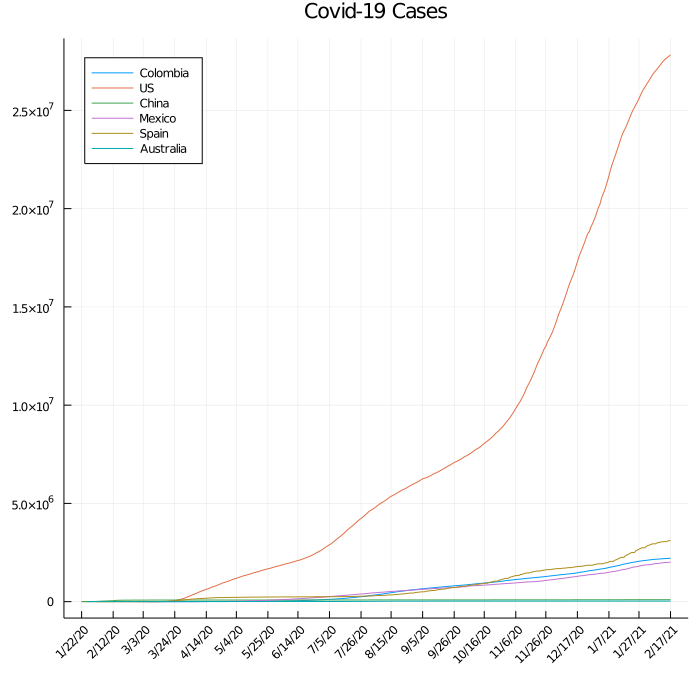

In [52]:
title!("Covid-19 Cases")
p

## Log10 Scale

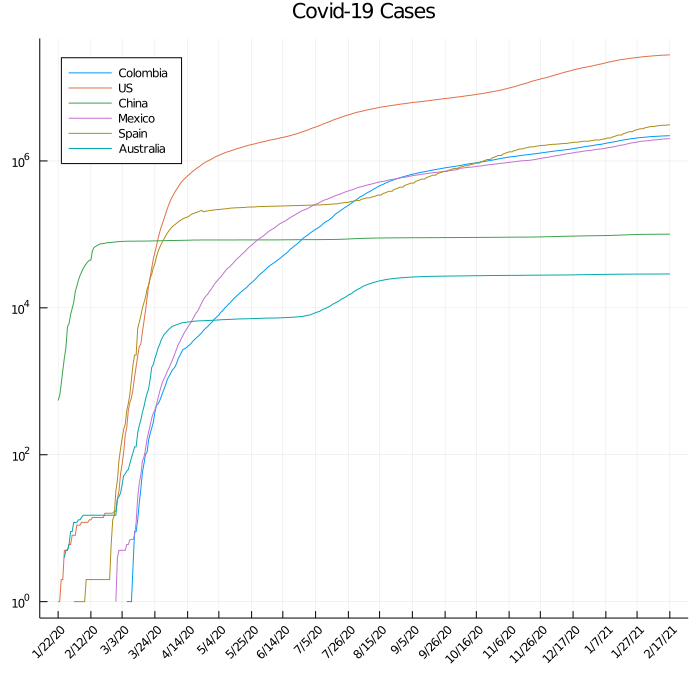

In [53]:
p=plot();
count=1
for country in countries
    mycountrydata=countriesvector[count, 1:end]
    plot!(dates,  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
    count=count+1
end
title!("Covid-19 Cases")
p

In [54]:
using Interact

In [55]:
using WebIO

In [62]:
num_days=length(dates)


@manipulate for i in 1:num_days
    a=1
    p=plot();
    for country in countries
        mycountrydata=countriesvector[a, 1:i]
        plot!(xlim=(0, num_days), dates[1:i],  mycountrydata, xticks=20, xrotation=45, size=[700,700], label=country, leg=:topleft, yscale=:log10)
        a=a+1
    end
    title!("Covid-19 Cases")
    p

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 393,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
197, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\juana_000\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\juana_000\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000131bb990, Task (runnable) @0x00000000131bb990), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",